##### Algorithms and Data Structures (Winter - Spring 2022)

* [Table of Contents](ADS_TOC.ipynb)
* <a href="https://colab.research.google.com/github/4dsolutions/elite_school/blob/master/ExploringPython.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
* [![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/4dsolutions/elite_school/blob/master/ExploringPython.ipynb)

## School of Tomorrow

The idea of a school in the future provides a good excuse to learn and/or review our tools.  

In reality, your school math courses may require you to buy a scientific calculator.  It's not either/or.  These tools are free, once you have the hardware on which to install them.

#### Dimensions of Python

1. keywords and punctuation (syntax)
2. builtins as in `dir(__builtins__)`
3. `__special_names__` (also `__ribs__`)
4. Standard Library (hundreds of modules)
5. 3rd Party (thousands of packages and modules)

1-4 might be called "core Python".

## Topics in Core Python

* Decorators
* Context Managers
* Properties

The above topics are above "beginner" level.  It's possible to be productive in Python without knowing about the above.

#### Decorators

A decorator swallows the callable it decorates and returns a new object of the same name.

The process is a somewhat analogous to "abuction" in UFO science fiction.  An object is transformed without making it too obvious.

In [37]:
class UFO:
    """
    I'm from Mars!
    """
    
    def __init__(self, F): # abduct
        self.mark = '  '
        self.F = F
        self.__doc__ = F.__doc__
        
    def __call__(self, x):
        return self.F(x)  # stored function
    
    def __repr__(self):
        return f"Abducted_Function: {self.F.__doc__.strip()}"

@UFO
def anyF(x):
    """
    I'm a function: anyF
    """
    return x

In [19]:
anyF(10)

10

In [20]:
anyF

Abducted_Function: I'm a function: anyF

In [21]:
print(anyF.__doc__)


    I'm a function: anyF
    


*What's a Practical Application?*

How about Function Composition?

Suppose you want to write `g(f(x))` as a pipeline of functions: `(g @ f)(x)`.  These would mean the same thing:  do f to x, then do g to the result. 

In [46]:
class Compose:
    """
    Make me into a function that knows how to @
    with another function
    """
    
    def __init__(self, F):
        self.func = F
        
    def __call__(self, val):
        return self.func(val)
    
    def __matmul__(self, other):
        return Compose(lambda x: self(other(x)))
    
@Compose
def g(x):
    return x + 2

@Compose
def h(x):
    return 2 * x

In [39]:
g(10)

12

In [40]:
h(10)

20

In [41]:
h(g(10))

24

In [42]:
g(h(10))

22

In [47]:
(h @ g)(10)

24

In [48]:
(g @ h)(10)

22

In [49]:
(h @ h @ h @ h)(10)

160

#### Context Managers

In [60]:
class Castle:
    
    def __enter__(self):
        print("Welcome")
        return self
        
    def play(self):
        return "Let's play a game!"
        
    def __exit__(self, *oops):
        print("Come again")
        
    def __repr__(self):
        return "Hear me roar!"

In [61]:
with Castle() as keep:
    print(keep.play()) 

Welcome
Let's play a game!
Come again


In [153]:
import sqlite3 as sql

class DB:
    
    def __init__(self, name):
        self.name = name
    
    def __enter__(self):
        self.conn = sql.connect(self.name)
        self.curs = self.conn.cursor()
        return self
        
    def __exit__(self, *oops):
        self.conn.close()

In [160]:
with DB("roller_coasters.db") as db:
    db.curs.execute("SELECT Name, Country FROM Coasters ORDER BY Name")
    for rec in db.curs.fetchall():
        print("{:50} {:20}".format(rec[0], rec[1]))

Afterburner                                        USA                 
Alpengeist                                         USA                 
American Eagle                                     USA                 
Apollo's Chariot                                   USA                 
Batman Knight Flight                               USA                 
Beast                                              USA                 
Blue Streak                                        USA                 
Boss                                               USA                 
Cannon Ball                                        USA                 
Canyon Blaster                                     USA                 
Chang                                              USA                 
Cheetah                                            USA                 
Coaster Thrill Ride                                USA                 
Colossus                                           USA          

#### Properties

Properties are implemented using decorators.  By decorating a method, you can make it behave like an attribute.

In [161]:
class Sequence:
    
    def __init__(self, s):
        self.seq = s
    
    @property
    def average(self):
        return sum(self.seq)/len(self.seq)

In [163]:
mynums = Sequence((1,2,3,4,5,6,7,8,9))
mynums.average

5.0

In [62]:
import magic_circle_v2 as circle

In [63]:
zone = circle.Circle(5)

In [64]:
zone.radius

5

In [65]:
zone.circumference

31.41592653589793

In [66]:
zone.area

78.53981633974483

In [67]:
zone.area = 10

In [69]:
zone.radius

1.7841241161527712

## 3rd Party Packages

* sympy
* numpy
* matplotlib
* pandas

#### Sympy

In [71]:
import sympy as sp

![Gaussian](https://www.gstatic.com/education/formulas2/443397389/en/normal_distribution.svg)

In [88]:
x, σ, μ = sp.symbols(['x','σ', 'μ'])

In [89]:
f = sp.Symbol('f')

In [96]:
expr1 = (1/(σ * sp.sqrt(2 * sp.pi)))
expr1

sqrt(2)/(2*sqrt(pi)*σ)

In [126]:
expr2 = sp.exp(sp.Rational(-1,2) * ((x - μ)/σ)**2)
expr2

exp(-(x - μ)**2/(2*σ**2))

In [127]:
gaussian = expr2 * expr1

In [128]:
gaussian = gaussian.subs(μ, 0)
gaussian = gaussian.subs(σ, 1)
gaussian

sqrt(2)*exp(-x**2/2)/(2*sqrt(pi))

#### Numpy

In [72]:
import numpy as np

In [73]:
domain = np.linspace(-6, 6, 500)

In [164]:
domain[0:10]

array([-6.        , -5.9759519 , -5.95190381, -5.92785571, -5.90380762,
       -5.87975952, -5.85571142, -5.83166333, -5.80761523, -5.78356713])

In [165]:
domain[-10:]

array([5.78356713, 5.80761523, 5.83166333, 5.85571142, 5.87975952,
       5.90380762, 5.92785571, 5.95190381, 5.9759519 , 6.        ])

In [166]:
# make f ready to work with numpy
f = sp.lambdify(x, gaussian, 'numpy')

In [137]:
y_vals = f(domain)

#### Matplotlib

In [116]:
import matplotlib.pyplot as plt

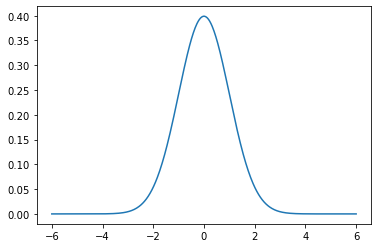

In [135]:
plt.plot(domain, f(domain));

#### Pandas

In [136]:
import pandas as pd

In [138]:
bell_curve_df = pd.DataFrame({'x':domain, 'y':y_vals})
bell_curve_df.head()

,x,y
0,-6.000000,6.075883e-09
1,-5.975952,7.016936e-09
2,-5.951904,8.099059e-09
3,-5.927856,9.342657e-09
4,-5.903808,1.077098e-08


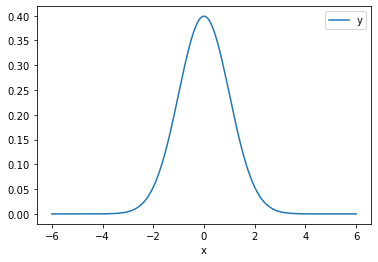

In [140]:
bell_curve_df.plot(x='x', y='y');

In [146]:
sp.integrate(gaussian, (x, -6, 6)).evalf(6)

1.00000